# Multiple Linear Regression

## **Problem**
Given the data $(x_i,y_i), i= 1,2,..., N$, this time with $y_i\in \mathbb{R}$ and $x_i\in\mathbb{R}^{p}$, we fit the multi-variable linear function

$$y_i\approx\mathbf{f}(x)=\beta_{0}+\beta_{1}x_{i1}+..+\beta_{p}x_{ip} = \mathbf{x}_i^T\beta,$$  

$$\mathbf{x}_i=(1,x_{i1},..,x_{ip})\in\mathbb{R}^{p+1},\beta = (\beta_{0},\beta_{1},..,\beta_{p})\in\mathbb{R}^{p+1}.$$

Here $\beta$'s are regression coefficients, and $\beta_{0}$ is the intercept. 

The data can be written as

$$Y=
 \begin{bmatrix}
   y_1\\
   y_2 \\
   \cdots \\
   y_N
  \end{bmatrix} 
$$

Our prediction in matrix form is

$$
  \begin{bmatrix}
   \mathbf{f}(\mathbf{x}_1)\\
   \mathbf{f}(\mathbf{x}_2)\\
   \cdots \\
   \mathbf{f}(\mathbf{x}_N)
  \end{bmatrix} 
  =
  \begin{bmatrix}
   1& x_{11}& \cdots & x_{1p}\\
   1& x_{21}& \cdots & x_{2p}\\
   \cdots \\
   1& x_{N1}& \cdots & x_{Np}  
   \end{bmatrix} 
    \begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \cdots \\
    \beta_{p}
  \end{bmatrix}
= \mathbf{X}\beta,
$$

Here $\mathbf{X}$ is a $N\times (p+1)$ matrix, and is called the data matrix or design matrix.


### Loss Function and Optimization

With the dataset, define the loss function $L(\beta)$ of parameters $\beta$, which is the **Residual Sum of Squares** (RSS). We could also divide it by $N$ to get the **Mean Squared Error** (MSE). This does not change the optimal solution

$$L(\beta)= \sum_{i=1}^N(y_i-\mathbf{x}_i^T\beta)^{2},$$

In matrix form, it can be written as 


$$ L(\beta) = ||Y-\mathbf{X} \beta||^{2} $$

We arrive at the optimization problem:

$$\min_{\beta} L(\beta).$$

To solve the critical points, we have $\nabla L(\beta)=0$.

In Matrix form, it can be expressed as

$$\mathbf{X}^{T}\mathbf{X}\beta=\mathbf{X}^{T}Y,$$

also called the **normal equation** of linear regression. 

The optimal parameter is given by
$\hat{\beta}= (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}Y$.

The prediction of the model is $\hat{Y}=\mathbf{X}\hat{\beta}$.

To evaluate the model, we can use the **coefficient of determination** $R^{2}$, RSS or MSE.


<!-- **[Geometrical Interpretation](https://en.wikipedia.org/wiki/Ordinary_least_squares)**

From the normal equation,

$$\mathbf{X}^{T}(\mathbf{Y}-\mathbf{X} \hat{\beta})=0$$

We are requiring that the residual $Y-\mathbf{X} \hat{\beta}$ is orthogonal to the column space of $\mathbf{X}$. -->

**Exercise**: Check that when $p=1$, the solution is equivalent to the single-variable regression. 

In [1]:
import numpy as np
from sklearn import linear_model

# A synthetic dataset

N = 100
X = np.random.rand(N,2)
y = 1 + 2*X[:,0] + 3*X[:,1] + np.random.normal(0,0.1,N)


lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(X,y) 

print(lreg_sklearn.intercept_, lreg_sklearn.coef_)

1.0213983560341369 [1.95369397 2.97982926]


Text(0, 0.5, 'X2')

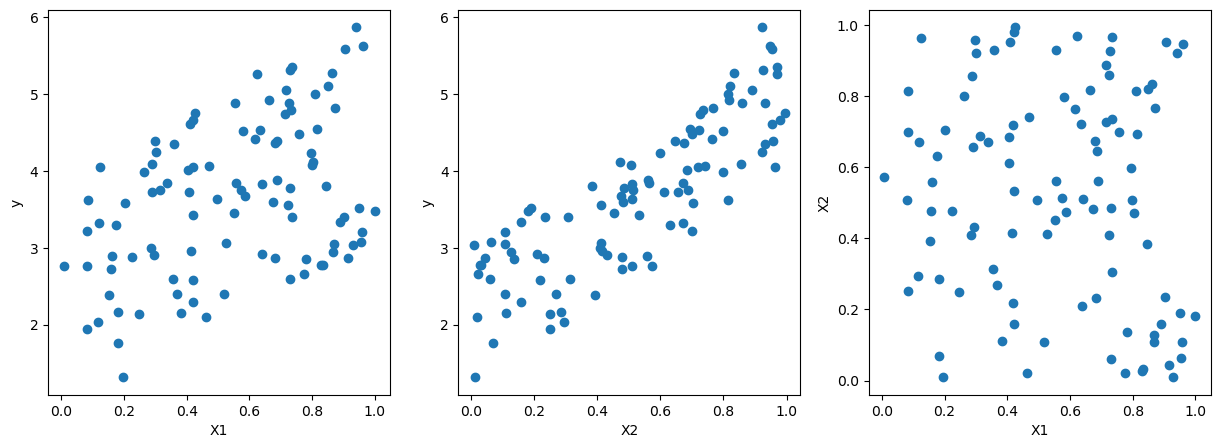

In [2]:
import matplotlib.pyplot as plt

# pairwise scatter plot of X1, X2, y
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(X[:,0],y)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('y')

ax[1].scatter(X[:,1],y)
ax[1].set_xlabel('X2')
ax[1].set_ylabel('y')

ax[2].scatter(X[:,0],X[:,1])
ax[2].set_xlabel('X1')
ax[2].set_ylabel('X2')

In [8]:
# Alternative ways to solve the linear regression problem

# Add a column of ones to the X matrix, now XX is the N x 3 design matrix
ones = np.ones((N,1))
XX = np.hstack((ones,X)) 

# (1) solve the normal equation
beta = np.linalg.inv(XX.T@XX)@XX.T@y
print(beta)


# (2) least-squares solution to a linear matrix equation.
beta = np.linalg.lstsq(XX,y,rcond=None)[0]
print(beta)

# the results are the same as the results from sklearn

[1.02139836 1.95369397 2.97982926]
[1.02139836 1.95369397 2.97982926]


In [6]:
import plotly.graph_objs as go
import plotly.express as px

# Assuming coefficients and intercept from the sklearn linear regression model
coefficients = lreg_sklearn.coef_
intercept = lreg_sklearn.intercept_

# Create meshgrid for the regression plane
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = coefficients[0] * xx + coefficients[1] * yy + intercept

# Create the scatter plot for the data points
scatter = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Create the surface plot for the regression plane
surface = go.Surface(
    x=xx,
    y=yy,
    z=zz,
    colorscale='reds',
    opacity=0.5,
    name='Regression Plane'
)

# Create the layout
layout = go.Layout(
    title='3D Plot of Data Points and Regression Plane',
    scene=dict(
        xaxis_title='X_1',
        yaxis_title='X_2',
        zaxis_title='Y'
    )
)

# Combine the scatter and surface plots
fig = go.Figure(data=[scatter, surface], layout=layout)

# Show the plot
fig.show()

Linear regression with the penguing dataset


We will use the 3 features `flipper_length_mm`,`bill_length_mm` and `bill_depth_mm` to predict the `body_mass_g` of the penguins.

In [9]:
import seaborn as sns


df = sns.load_dataset('penguins')

# need to remove missing values
df.dropna(inplace=True,thresh=6)

X = df[['flipper_length_mm','bill_length_mm','bill_depth_mm']]
y = df['body_mass_g']


# predict body mass from flipper length and bill length
lreg_sklearn = linear_model.LinearRegression()


lreg_sklearn.fit(X,y)
lreg_sklearn.score(X,y)

0.7614704841272493

## Interpretation of the coefficients


The coefficient can be interpreted as "the change in the target variable for a one-unit change in the predictor variable, holding other predictors constant".

**Does the size of the coefficient mean "importance"?**

This interpretation can make sense in some cases when the variables are of the same scale and "comparable". For example, if Y is the house price, and X1 is the size of the living room in square feet, X2 is the size of the garage in square feet. Then maybe the coefficient of X1 is larger than X2, and we can say that the size of the living room has more impact on the house price than the size of the garage.

Generally, the size of the coefficient is not a good indicator of the importance of the feature. The size of the coefficient is affected by the scale of the feature. If we change the unit of the feature, the coefficient will change accordingly. For example, if we change the unit of the feature from meters to centimeters, the coefficient will be 100 times larger. However, the importance of the feature does not change.

But we can ask the following question: 

**If we exclude or include a feature from the model, how much does the model performance decrease or increase?**

If the model performance decreases significantly when we exclude a feature, then we can consider the feature to be important in making predictions.

We would like to find the smallest set of features that give good performance. By selecting only a few features, the model is also easier to interpret: For example, for medical diagnosis, we would like to use as few features as possible to make the diagnosis instead of doing all the lab tests available.

Some methods to select the features include:

- **Best subset selection**: Try all possible subsets of features and choose the one that gives the best performance.

- **Forward selection**: Start with an empty set of features. Add the feature that gives the best performance. Continue adding features until the performance plateaus.

- **Backward selection**: Start with all features. Remove the feature that gives the smallest decrease in performance. Continue removing features until removing any feature significantly decreases the performance.

However, for the forward and backward selection, the result might depends on the order of adding/removing features. For example, suppose $Y = X_1 + X_2$. $X_3$ is highly correlated with $X_2$. Then both ($X_1$, $X_3$) and ($X_1$,$X_2$) are good models. If we start with all ($X_1$, $X_2$, $X_3$), we might end up with ($X_1$, $X_2$) or ($X_1$, $X_3$) depending on the order of considering the features.

# Colinearity 

If two variables are highly correlated, intuitively, we can say that they are measuring the same thing. In the context of linear regression, this is called multicollinearity.

Suppose $Y = aX_1$ and $X_2 = bX_1$, then we can write $Y = \beta_1 X_1 + \beta_2 X_2$ for any $\beta_1$  and $\beta_2$ such that $\beta_1 + b \beta_2 = a$.

We can see that the coefficients are not unique. 

This cause a few problems:

1. **Interpretation**: it's difficult to interpret the coefficients. Originally, we would say that a one unit increase in $X_1$ would lead to a $\beta_1$ increase in $Y$. But now, we can't say that, because we can't change $X_1$ without changing $X_2$.

2. **Large Variance of the parameter**: Since there could be infinite solutions, there is no guarantee which one the solver will find. Therefore small changes in the data could lead to large changes in the coefficients.

3. **Numerical Stability**: Sometimes the solver can't find the solution.

However, this does not affect the prediction: even though the coefficients are not unique, the prediction will be the same.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.random.uniform(0,1,(100,1))

# append collinear columns
X = np.column_stack((X, X[:,0]*2))
y = X[:,0] + np.random.randn(100)

# regression with X0 and X1=2*X0
lreg_sklearn = LinearRegression()
lreg_sklearn.fit(X,y)
score = lreg_sklearn.score(X,y)
print(f'coefs: {lreg_sklearn.coef_}, intercept: {lreg_sklearn.intercept_}, score: {score}')


# regression with X0
lreg_sklearn.fit(X[:,0:1],y)
score = lreg_sklearn.score(X[:,0:1],y)
print(f'coefs: {lreg_sklearn.coef_}, intercept: {lreg_sklearn.intercept_}, score: {score}')



coefs: [0.08374443 0.16748885], intercept: 0.3645154675052994, score: 0.015743465462821682
coefs: [0.41872214], intercept: 0.36451546750529923, score: 0.015743465462821682
